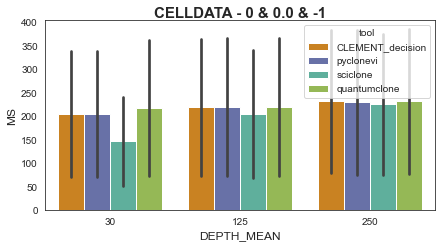

In [1]:
import numpy as np 
import pandas as pd
import os, glob

def drawfigure (long_df, x, title, saveloc ):
    import matplotlib 
    matplotlib.rcParams["font.family"] = 'arial'
    import palettable
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import ttest_ind

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in safe7]
    sns.set_style("white")
    #sns.set_palette("tab10")
    sns.set_palette(sns.color_palette(colorlist))


    # Create a grouped bar graph
    fig, ax = plt.subplots(1, figsize = (7, 3.5))
    sns.barplot(x = x, y = 'mean', hue = 'tool', data = long_df, ax = ax)
    ax.set_xlabel( x, fontsize = 12 )
    ax.set_ylabel( "MS", fontsize = 12 )
    ax.set_title( title , fontsize = 15, y = 0.98, fontweight = "semibold" )
    ax.legend ( title = 'tool' )
    plt.savefig ( saveloc, dpi = 300 )
    plt.show()


def bm_by_depth ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    for NUM_PARENT in NUM_PARENT_LIST:        
        for FP_RATIO in FP_RATIO_LIST:
            for AXIS_RATIO in AXIS_RATIO_LIST:        
                long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "tool", "mean", "sd"] )
            
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    for NUM_BLOCK in NUM_BLOCK_LIST:
                        for NUM_MUTATION in NUM_MUTATION_LIST:
                            INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/*" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/BM_FINAL.tsv") )

                            for INPUT_DIR in INPUT_DIR_LIST:
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue
            
                                df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                                for tool in toollist:
                                    long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
                    
                drawfigure (long_df, 'DEPTH_MEAN', "CELLDATA - {} & {} & {}".format (NUM_PARENT, FP_RATIO, AXIS_RATIO), "/data/project/Alzheimer/YSscript/cle/Benchmarking/2.CellData/bm_for_revision/2.CellData-bydepth_{}_{}_{}.jpg".format (NUM_PARENT, FP_RATIO, AXIS_RATIO))







if __name__ == "__main__":
    kwargs = {}

    NUM_BLOCK_LIST = [  1  ]             # 1, 2, 3
    NUM_MUTATION_LIST = [1000, 500, 100]    # 1000, 500, 100
    DEPTH_MEAN_LIST = [250, 125, 30]       # 250, 125, 30
    NUM_PARENT_LIST = [ 0 ]       # 0 , 1
    FP_RATIO_LIST = [ 0.0  ]        # 0.0, 0.1
    AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2

    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]
                           

    # Depth에 따른 benchmark
    bm_by_depth ( NUM_BLOCK_LIST, [500], DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST )
    
    #  NUM_MUTATION에 따른 benchmark
    #bm_by_nummutation ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, [250], NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST )


        